# **Fashion-MNIST with `CNN`(s)**

> Here, we will solve a very common Computer Vision project `Fashion MNIST` using `CNN`(Convolutional Neural Network).

'''

* `Fashion MNIST` is a `Image Classification` dataset with `28x28` grayscale images of `10` Fashion categories.
* Here, we will build a` Deep Learning model` using `Convolutional Neural Networks (CNNs)` to solve this Image Classification problem.

![Image](https://thiagolcmelo.github.io/assets/img/fashion-mnist.png)

***
***

### **Importing Libraries**

We will import some basic python libraires, such as:

* `Numpy` - a Python library used for working with arrays.
* `Pandas` - a Python library used for data analysis and manipulation.
* `Matplotlib` - a plotting library for the Python programming language and its numerical mathematics extension NumPy.
* Additionally, `%matplotlib inline` is a magic command in Jupyter Notebook that allows you to display plots in the notebook itself. It is used to set the backend of matplotlib to the inline backend.
* `Pyplot` - a module in the Matplotlib library which provides a convenient interface for creating plots and charts.
* `Tensorflow` - a free and open-source software library for machine learning and artificial intelligence.
* `Keras` - an open-source high-level neural network library, which is written in Python.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

2025-04-30 12:11:03.198426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-30 12:11:04.159890: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/lib/x86_64-linux-gnu/:/opt/conda/lib
2025-04-30 12:11:04.159982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local

### **Importing Dataset**

* Here we import Fashion MNIST dataset from `keras.datasets`.
* There are `60,000` Train images and labels and `10,000` for Test.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

* Also we will make a `list` of the `10 classes` (clothing categories). We will later use it to `predict` using our Model.

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

### **Reshaping Data**

* We will reshape our Train and Test Image dataset.
* `60,000` and `10,000` are the number of images for `Train` and `Test` respectively.
* `28,28` are the dimensions of the images in `pixels`.
* And since the images are in `grayscale`, they only need `1` colour channel.

In [4]:
X_train_full = X_train_full.reshape((60000, 28,28, 1))
X_test = X_test.reshape((10000, 28,28, 1))

### **Split the data into Train/ Validation/ Test Datasets**

* In the earlier step of importing the date, we had 60,000 datasets or Training and 10,000 Test datasets.
* Now we further split the Training data into Train/ Validation. Here is how each type of dataset is used in Deep Learning.

Use of each each type of Dataset in Deep Learning:-

* `Training Data` - used for Training model.
* `Validation Data` - used for tuning the Hyper-parameters and evaluate the Models.
* `Test Data` - used to test the Model after the Model has been trained.

'''

* We will take first `5000` images and labels  out of the `60,000` as `Validation` dataset, and the rest for the model to `Train` on.

In [5]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### **Class Distribution Visualization**

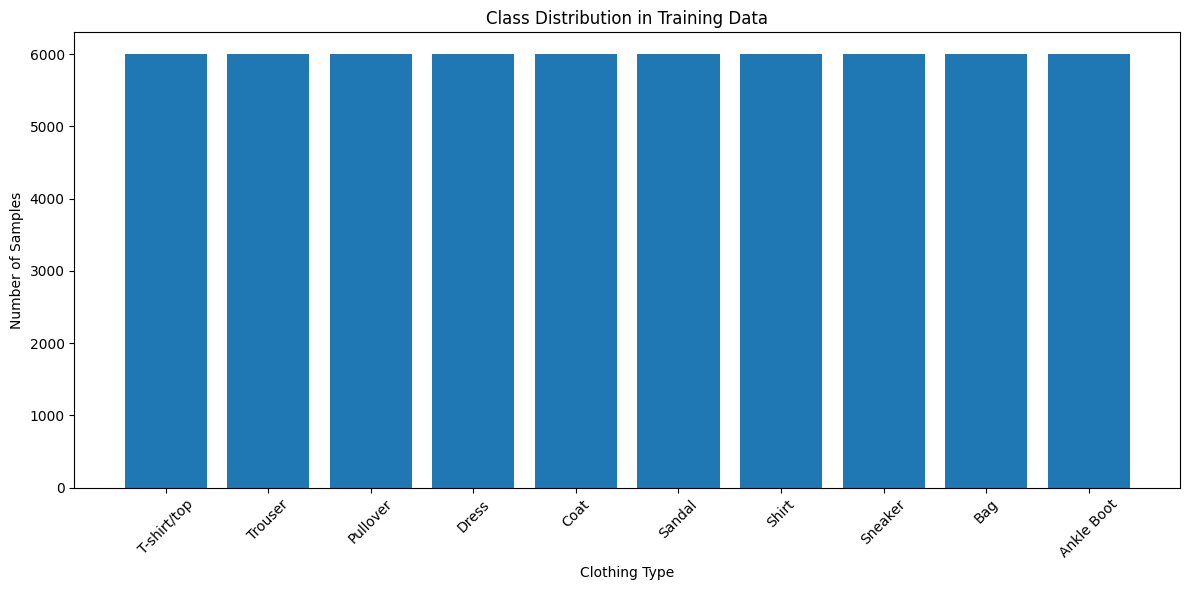

Class Distribution:
T-shirt/top: 6000 samples (10.0%)
Trouser: 6000 samples (10.0%)
Pullover: 6000 samples (10.0%)
Dress: 6000 samples (10.0%)
Coat: 6000 samples (10.0%)
Sandal: 6000 samples (10.0%)
Shirt: 6000 samples (10.0%)
Sneaker: 6000 samples (10.0%)
Bag: 6000 samples (10.0%)
Ankle Boot: 6000 samples (10.0%)


In [6]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
class_counts = np.bincount(y_train_full)
plt.bar(range(len(class_names)), class_counts)
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.title('Class Distribution in Training Data')
plt.xlabel('Clothing Type')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

# Calculate and print class distribution
print("Class Distribution:")
for i, name in enumerate(class_names):
    print(f"{name}: {class_counts[i]} samples ({class_counts[i]/len(y_train_full)*100:.1f}%)")

### **Data Augmentation**

> `Data Augmentation` is a technique used in machine learning to `reduce overfitting` when training a machine learning model by training models on several `slightly-modified` copies of `existing data`.

'''

We will perform `Data Augmentation` on `Train` and `Validation` images using following Augmentation:-

* `rescale=1./255` - used to convert the pixels in range `[0,255]` to range `[0,1]`. This process is also called `Normalizing the Input`.
* `rotation_range=20` - used to `rotate` the image by `0 to 20 degrees`. This method of augmentation rotates the pixels of the image.
* `width_shift_range=0.2` - used to `shift` the image in the `horizontal` direction.
* `height_shift_range=0.2` - used to `shift` the image in the `vertical` direction.
* `shear_range=0.2` - used to apply `shear` transformation to the image. `Shear` is a transformation that `shifts the rows or columns` of an image or a video frame by gradually `increasing the offset` from left to right or right to left.
* `zoom_range=0.2` - used to apply `zoom` transformation to the image.
* `horizontal_flip=True` - used to `flip` the image `horizontally`.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Generating batches of tensor image data
# Generating batches of tensor image data with more balanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,  # Less rotation to avoid distortion
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'  # Better handling of empty pixels after transformations
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_valid, y_valid, batch_size=32)

### **Model Architecture**

* Here we will build a `Convolutional Neural Network` using keras `Sequential API`.

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))  
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))  
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))  

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))  # Higher dropout before final classification
model.add(Dense(10, activation="softmax"))

2025-04-30 12:11:05.440867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/lib/x86_64-linux-gnu/:/opt/conda/lib
2025-04-30 12:11:05.440908: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2025-04-30 12:11:05.440929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fashion-mnist-gcp-instance): /proc/driver/nvidia/version does not exist
2025-04-30 12:11:05.443547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable t

#### **Architecture Explained**

**1.** `Conv2D [2D Convolutional Neural Network]` - There are `3 Conv2D` networks. These networks are designed to progressively learn more complex features from the input images:

* `filters` - We use an increasing number of filters (32→64→128) to capture progressively more complex patterns. The initial layer with 32 filters detects basic patterns like edges, textures, and simple shapes. The middle layer with 64 filters combines these basic features to form more complex patterns like clothing outlines. The final layer with 128 filters identifies high-level features specific to different clothing items.

* `kernel_size` - The kernel_size of (3,3) provides a balance between capturing local patterns and computational efficiency. These 3×3 filters scan the entire image to detect relevant features.

* `strides` - Using a stride of 1 ensures we don't miss any spatial information, as the filter moves one pixel at a time during convolution.

* `padding` - Setting padding to "same" preserves the spatial dimensions of our feature maps, ensuring we don't lose information at the image borders.

* `activation` - The ReLU (Rectified Linear Unit) activation function introduces non-linearity, allowing the network to learn complex patterns. ReLU is defined as f(x) = max(0,x), which outputs 0 for negative inputs and passes through positive values unchanged.

* `input_shape` - The first layer takes input with shape (28,28,1), representing the width, height, and channel dimensions of our grayscale Fashion MNIST images.

**2.** `MaxPooling2D` - After each convolutional layer, MaxPooling2D reduces the spatial dimensions of our feature maps:

* Each MaxPooling2D layer with pool size (2,2) reduces the width and height by half, keeping only the maximum value from each 2×2 region.
* This downsampling serves multiple purposes:
  * Reducing computational complexity by decreasing the number of parameters
  * Creating a form of translational invariance, helping the model recognize objects regardless of their exact position
  * Focusing on the most important features while discarding less relevant details
  * Each successive pooling layer increases the receptive field, allowing deeper layers to "see" larger portions of the original image

**3.** `Dropout` - Added strategically after each pooling layer and the dense layer:

* Dropout is a powerful regularization technique that randomly deactivates a percentage of neurons during each training iteration.
* We use a 25% dropout rate (0.25) after each convolutional block to prevent overfitting.
* A higher dropout rate of 50% (0.5) is applied after the dense layer, where the majority of model parameters reside.
* Benefits of dropout include:
  * Preventing co-adaptation of neurons (neurons becoming too dependent on each other)
  * Creating an effect similar to ensemble learning, as each training batch effectively trains a slightly different network
  * Forcing the network to learn more robust features that don't rely on specific neuron combinations

**4.** `Flatten` - The Flatten layer transforms our 3D feature maps (width × height × channels) into a 1D vector:

* After the final convolutional block, we have feature maps of reduced spatial dimensions but increased depth (more channels).
* The Flatten layer takes these feature maps and stretches them into a single long vector.
* This transformation is necessary to connect the convolutional layers to the fully connected (Dense) layers.
* The flattening preserves all the extracted features while changing only their arrangement.

**5.** `Dense` - We use two fully connected layers for final classification:

* The first Dense layer has 512 neurons with ReLU activation:
  * This layer interprets the high-level features extracted by the convolutional layers
  * Its large number of neurons gives it the capacity to learn complex combinations of features
  * The ReLU activation allows for non-linear separations in the feature space

* The final Dense layer has 10 neurons (one for each clothing category) with softmax activation:
  * Softmax transforms the raw outputs into a probability distribution over the 10 classes
  * This ensures all outputs sum to 1 and fall between 0 and 1
  * The neuron with the highest activation represents the model's classification

This architecture balances model complexity with regularization, creating a network deep enough to learn the distinguishing features of clothing items while including dropout to prevent overfitting and ensure good generalization to unseen examples.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

#### **Model Summary Analysis**

In [10]:
# Calculate total parameters
trainable_params = sum([np.prod(layer.get_weights()[0].shape) + np.prod(layer.get_weights()[1].shape if len(layer.get_weights()) > 1 else []) for layer in model.layers if layer.trainable_weights])
print(f"Total trainable parameters: {trainable_params:,}")

# Print per-layer parameter count for better understanding
print("\nParameter distribution by layer:")
for i, layer in enumerate(model.layers):
    if layer.trainable_weights:
        params = sum([np.prod(w.shape) for w in layer.get_weights()])
        print(f"Layer {i} ({layer.__class__.__name__}): {params:,} parameters ({params/trainable_params*100:.2f}%)")

Total trainable parameters: 688,138

Parameter distribution by layer:
Layer 0 (Conv2D): 320 parameters (0.05%)
Layer 3 (Conv2D): 18,496 parameters (2.69%)
Layer 6 (Conv2D): 73,856 parameters (10.73%)
Layer 10 (Dense): 590,336 parameters (85.79%)
Layer 12 (Dense): 5,130 parameters (0.75%)


### **Callbacks**

* We will also use some `Callbacks` to improve our effectiveness and efficiency in training the Model.

> `Callbacks` are functions that can be passed to a neural network `during training` to perform certain `actions at specific points` during the `training` process.

* We will use following Callbacks -

1. `early_stopping` - The `EarlyStopping` callback is a Keras callback that can be used to `stop the training process early` if the monitored value stops improving. Here we monitor `val_loss` and use `10` as `patience` value, which means the callback will wait `10 epochs` before executing.
2. `model_checkpoint` - The `ModelCheckpoint` callback is a Keras callback that can be used to `save the weights` of the neural network at certain intervals during training. Here we will `save only best model`.
3. `reduce_lr_on_plateau` - ReduceLROnPlateau is a callback that `monitors a quantity` and if no improvement is seen for a patience number of epochs, the `learning rate is reduced`. Here we reduce the learning rate by `10 percent`.
4. `tensorboard` - TensorBoard is a `visualization tool` provided with TensorFlow. This callback `logs events` for TensorBoard, including metrics summary plots, training graph visualization, weight histograms, and sampled profiling.

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor accuracy instead of loss
    patience=10,
    verbose=1,
    restore_best_weights=True,
    mode='max'  # Looking for maximum accuracy
)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
reduce_lr_on_plateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # More gradual reduction
    patience=3,
    verbose=1,
    min_delta=0.001,
    min_lr=1e-6
)
tensorboard = TensorBoard(log_dir='./logs')

callbacks = [early_stopping, model_checkpoint, reduce_lr_on_plateau, tensorboard]

### **Training Model**

* Building of every `batch` used into training uses random images.
* Before beginning to train, we will set `random seed number`, so that every time we train our model we get the `same results`.

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

We then compile our model using -

* `sparse_categorical_crossentropy` - We use this as our `loss` function as we are training a `Multi-Class Classification` model.
* `sgd` - `Stochastic Gradient Descent` (SGD) is an iterative method for `minimizing a function`, such as the loss or error function, by moving in the direction of the gradient. It is a type of `gradient descent` optimizer that uses a `randomly selected subset` of the data instead of the entire data set for each iteration.
* `accuracy` -  The metrics argument is used to specify the metrics to be `evaluated` by the model during `training and testing`. Here we use `accuracy`.

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

* Now we train our model.

In [ ]:
# Calculate steps based on actual dataset size
steps_per_epoch = len(X_train) // 32  # Based on batch size
validation_steps = len(X_valid) // 32

history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    callbacks=callbacks)

Epoch 1/100
1718/1718 [==============================] - 36s 20ms/step - loss: 0.8427 - accuracy: 0.6796 - val_loss: 0.4737 - val_accuracy: 0.8093 - lr: 0.0010
Epoch 2/100
1718/1718 [==============================] - 34s 20ms/step - loss: 0.6110 - accuracy: 0.7664 - val_loss: 0.4040 - val_accuracy: 0.8498 - lr: 0.0010
Epoch 3/100
1718/1718 [==============================] - 34s 20ms/step - loss: 0.5463 - accuracy: 0.7928 - val_loss: 0.3589 - val_accuracy: 0.8686 - lr: 0.0010


### **Plotting Performance Graphs**

* Here we plot a performance graph showing our `Train` and `Validation` `loss` and `accurracy` along with the `learning rate`.

In [ ]:
# Plot accuracy and loss with clear markers for learning rate changes
plt.figure(figsize=(15, 7))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', markersize=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', markersize=2)

# Find points where learning rate changed
lr_changes = []
for i in range(1, len(history.history['lr'])):
    if history.history['lr'][i] < history.history['lr'][i-1]:
        lr_changes.append(i)

# Mark learning rate changes
for change in lr_changes:
    plt.axvline(x=change, color='r', linestyle='--', alpha=0.3)
    plt.text(change, 0.5, f"LR ÷ 5", rotation=90, verticalalignment='center')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o', markersize=2)
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', markersize=2)

# Mark learning rate changes on loss plot too
for change in lr_changes:
    plt.axvline(x=change, color='r', linestyle='--', alpha=0.3)

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **Add Confusion Matrix Analysis**

##### **Model Error Analysis**

The confusion matrix above shows the distribution of correct and incorrect classifications:
- Each row represents a true class
- Each column represents a predicted class
- The diagonal elements show correct classifications
- Off-diagonal elements show misclassifications

The most common errors typically occur between similar clothing items, such as:
- Shirts, T-shirts, and Pullovers
- Ankle boots and Sneakers
- Dresses and Coats

The classification report provides precision, recall, and F1-score for each class, helping identify which categories are most challenging for the model.

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
X_test_shaped = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_pred_probs = model.predict(X_test_shaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create and plot confusion matrix
plt.figure(figsize=(14, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

### **Model Visualization**

##### **Prediction Visualization with Confidence**

Below is a visualization of model predictions on random test images:
- Green titles indicate correct classifications
- Red titles indicate misclassifications
- Confidence percentages show the model's certainty about each prediction
- This helps identify patterns in model errors and confidence levels

In [ ]:
# Visualize model predictions with confidence scores
def plot_predictions_with_confidence(images, true_labels, predictions, class_names, n=25):
    plt.figure(figsize=(15, 15))
    for i in range(min(n, len(images))):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        
        predicted_class = np.argmax(predictions[i])
        confidence = predictions[i][predicted_class] * 100
        
        # Green for correct, red for incorrect
        color = 'green' if predicted_class == true_labels[i] else 'red'
        
        title = f"{class_names[true_labels[i]]}\nvs\n{class_names[predicted_class]}\n{confidence:.1f}%"
        plt.title(title, color=color, fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get random sample from test set
indices = np.random.choice(len(X_test), 25, replace=False)
sample_images = X_test[indices]
sample_labels = y_test[indices]
sample_images_shaped = sample_images.reshape(-1, 28, 28, 1)
sample_predictions = model.predict(sample_images_shaped)

# Visualize predictions with confidence
plot_predictions_with_confidence(sample_images, sample_labels, sample_predictions, class_names)

### **Loading Best Model**

* We first use `clear_session` to free up our memory and then delete the model.

In [ ]:
keras.backend.clear_session

In [ ]:
del model

* Now we load the `Best model` that our `callback` saved.

In [ ]:
from keras.models import load_model

model = load_model('best_model.h5')

### **Evaluating Model**

* Here we evaluate the overall `performance` of our model on the `Test Dataset`.

In [ ]:
result = model.evaluate(X_test, y_test)

In [ ]:
result

### **Predicting Classes**

* Now we will `predict classes` using our model.
* First we take a small subset from our `Test Dataset`.

In [ ]:
X_new = X_test[:3]

* The we use predict function using our model on the subset.

In [ ]:
y_pred = model.predict(X_new) 

* Rounding off to 2 Decimal digits.

In [ ]:
y_pred = np.round(y_pred, 2)

* Making an array of the position of the highest number present in each list.

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

* Now we see the values in our Test Subset.

In [ ]:
y_test[:3]

* Our model predicted it accurately.

'''

* Let's Display the first image in our Subset.

In [ ]:
print(plt.imshow(X_test[0].reshape((28,28))))

* And the value model predicted for the first image was `9` which according to our `class_names` list is ...

In [ ]:
class_names[9]

* Seems to match perfectly.

***
***